In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Calibration data

In [385]:
data = pd.read_csv("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/data/dynamic/calibration_incidence.csv", sep=',',decimal='.')
data=data.drop("Unnamed: 0",axis=1)
data.head(23)


,year,var,Lower,Mean,Upper
0,2000,e_inc_num,56000,139000,259000
1,2001,e_inc_num,57000,159000,312000
2,2002,e_inc_num,57000,175000,357000
3,2003,e_inc_num,54000,206000,456000
4,2004,e_inc_num,54000,221000,501000
5,2005,e_inc_num,56000,226000,510000
6,2006,e_inc_num,56000,239000,549000
7,2007,e_inc_num,60000,235000,525000
8,2008,e_inc_num,66000,221000,467000
9,2009,e_inc_num,68000,228000,483000


Text(0.5, 1.0, 'Estimated Incident cases of TB')

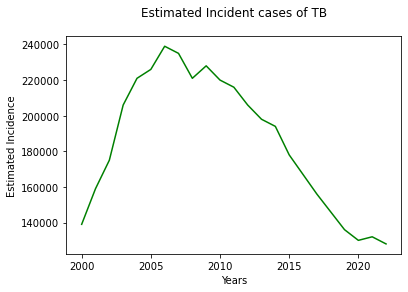

In [573]:
plt.plot(data["year"], data['Mean'],label="mean_estimate",color="green")
#plt=dataSoil.plot(x="days",y="bacteria_measured")
plt.xlabel('Years')
plt.ylabel('Estimated Incidence')
plt.title("Estimated Incident cases of TB",pad=20)

# Load Model

In [588]:
model = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/V8_months.mdl")

In [589]:
model_output = model.run()
display(model_output.head(276))

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Detection,progression,Relapse,CDR,CFR,deaths TB,...,general mortality,infection,initial incident,initial latent,Latent TB infection,diagnosis delay,Detected and Treated TB,relapse rate,force of infection,progression rate
0,276,0,12,1,115000.000000,49730.000000,439.213500,0.038333,0.007417,1854.166667,...,0.000667,192983.839180,3000000.0,1000000.0,1.000000e+06,6,5.500000e+04,0.007986,0.072,0.04973
12,276,0,12,1,101197.266723,88141.853639,10432.890158,0.038333,0.007417,1521.302770,...,0.000667,149740.536192,3000000.0,1000000.0,2.249449e+06,6,1.306447e+06,0.007986,0.072,0.04973
24,276,0,12,1,98552.295716,124316.744123,18352.217724,0.038333,0.007417,1667.016856,...,0.000667,156191.678419,3000000.0,1000000.0,2.748373e+06,6,2.298135e+06,0.007986,0.072,0.04973
36,276,0,12,1,114615.339056,145157.837537,26136.932248,0.038333,0.007417,2019.549049,...,0.000667,178996.574748,3000000.0,1000000.0,3.108666e+06,6,3.272967e+06,0.007986,0.072,0.04973
48,276,0,12,1,137855.522936,164477.241566,34988.263250,0.038333,0.007417,2423.423011,...,0.000667,201246.880184,3000000.0,1000000.0,3.508740e+06,6,4.381365e+06,0.007986,0.072,0.04973
60,276,0,12,1,163698.220876,184716.225369,45211.021765,0.038333,0.007417,2855.925805,...,0.000667,220037.877625,3000000.0,1000000.0,3.916394e+06,6,5.661498e+06,0.007986,0.072,0.04973
72,276,0,12,1,191290.890246,204022.967130,56861.694096,0.038333,0.007417,3312.590899,...,0.000667,234533.860396,3000000.0,1000000.0,4.283893e+06,6,7.120440e+06,0.007986,0.072,0.04973
84,276,0,12,1,219956.103715,220455.493444,69933.294466,0.038333,0.007417,3778.998412,...,0.000667,243677.835070,3000000.0,1000000.0,4.576643e+06,6,8.757316e+06,0.007986,0.072,0.04973
96,276,0,12,1,248578.186479,232541.274639,84338.172383,0.038333,0.007417,4234.456082,...,0.000667,246788.998783,3000000.0,1000000.0,4.769750e+06,6,1.056115e+07,0.007986,0.072,0.04973
108,276,0,12,1,275844.227564,239311.786436,99884.706388,0.038333,0.007417,4657.463759,...,0.000667,243973.359140,3000000.0,1000000.0,4.849473e+06,6,1.250795e+07,0.007986,0.072,0.04973


<AxesSubplot:>

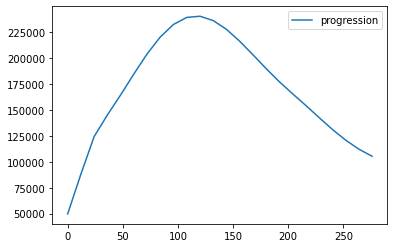

In [590]:
model_output.plot(y="progression")

## Calibration

In [591]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'force of infection'
parameter2 = 'relapse rate'
parameter3 = 'initial incident'
parameter4="progression rate"
parameter5 = 'initial latent'




def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'force of infection':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial incident': parameter3_value,
                               "progression rate":parameter4_value,
                               'initial latent': parameter5_value,
                              },
                       return_columns=['progression'],
                       return_timestamps=list(data.index*12)[0:23])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Mean"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [595]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 0.1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 0.2)


parameter5_guess = 100000
parameter5_bounds = (1, 3000000)



res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds])
res

      fun: 5970604774.195871
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.68582344e+07, -6.54058456e+06, -6.57265116e+03, -8.64963532e+06,
       -2.47665116e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 222
      nit: 19
     njev: 37
   status: 0
  success: True
        x: array([6.35601500e-02, 8.31388095e-03, 1.90306884e+06, 9.56609333e-02,
       1.73203886e+06])

In [596]:
p1, p2, p3,p4,p5= res.x
result = model.run(params=
                   {
                       'force of infection':p1,
                               'relapse rate':p2,
                               'initial incident': p3,
                               "progression rate":p4,
                       'initial latent': p5,
                   },
                   return_columns=['progression'])

result=result.reset_index(drop=True)
result["year"]=data["year"]

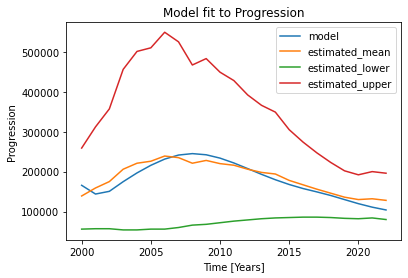

In [597]:
plt.plot(result["year"], result['progression'],label="model")
plt.plot(data["year"], data['Mean'], label='WHO_mean');
plt.plot(data["year"], data['Lower'], label='WHO_lower');
plt.plot(data["year"], data['Upper'], label='WHO_upper');
plt.xlabel('Time [Years]')
plt.ylabel('Progression')
plt.title('Model fit to Progression')
plt.legend(loc='upper right')
#plt.text(30,750000000, 'RMSE: 7.39% of Max', color='r', fontsize=12)